# Env

In [1]:
'''SELECT TOP 50000  Id, CreationDate,
                  Score, ViewCount,
                  AnswerCount, CommentCount,
                  FavoriteCount, Title,
                  Body, Tags
FROM Posts 
WHERE CreationDate BETWEEN CONVERT(datetime, '2018-01-01') AND CONVERT(datetime, '2020-02-01')
AND PostTypeId = 1 
AND Score > 5 
AND ViewCount > 20 
AND AnswerCount IS NOT NULL 
AND CommentCount > 5
AND len(Tags) > 0
ORDER BY CreationDatem
OFFSET 50000 '''

"SELECT TOP 50000  Id, CreationDate,\n                  Score, ViewCount,\n                  AnswerCount, CommentCount,\n                  FavoriteCount, Title,\n                  Body, Tags\nFROM Posts \nWHERE CreationDate BETWEEN CONVERT(datetime, '2018-01-01') AND CONVERT(datetime, '2020-02-01')\nAND PostTypeId = 1 \nAND Score > 5 \nAND ViewCount > 20 \nAND AnswerCount IS NOT NULL \nAND CommentCount > 5\nAND len(Tags) > 0\nORDER BY CreationDatem\nOFFSET 50000 "

In [2]:
import pandas as pd
import numpy as np

''' Data visualisation'''
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.offline as pyoff
import warnings

'''text processing '''
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import EnglishStemmer
import spacy
from spacy import displacy
from sklearn.preprocessing import KBinsDiscretizer

In [3]:
data1= pd.read_csv('../Data/stackexchange-2002-2012.csv')
data2= pd.read_csv('../Data/stackexchange-2013-2022.csv')
frame= [data1 , data2]
data = pd.concat(frame)

In [4]:
data

,Id,CreationDate,Score,ViewCount,AnswerCount,CommentCount,FavoriteCount,Title,Body,Tags
0,4,2008-07-31 21:42:52,792,69863,14,7,0,How to convert Decimal to Double in C#?,<p>I want to assign the decimal variable &quot...,<c#><floating-point><type-conversion><double><...
1,9,2008-07-31 23:40:59,2195,776461,72,10,0,How do I calculate someone's age based on a Da...,<p>Given a <code>DateTime</code> representing ...,<c#><.net><datetime>
2,13,2008-08-01 00:42:38,698,272985,27,10,0,Determine a user's timezone,<p>Is there a standard way for a web server to...,<html><browser><timezone><user-agent><timezone...
3,19,2008-08-01 05:21:22,350,67052,24,17,0,What is the fastest way to get the value of π?,<p>I'm looking for the fastest way to obtain t...,<performance><algorithm><language-agnostic><un...
4,123,2008-08-01 16:08:52,120,80193,16,8,0,Java lib or app to convert CSV to XML file?,<p>Is there an existing application or library...,<java><xml><csv><data-conversion>
...,...,...,...,...,...,...,...,...,...,...
49995,36372274,2016-04-02 10:48:30,6,1546,1,6,0,How to get conflicts before merge with JGit?,<p>I am trying to perform with JGit all the me...,<git><conflict><jgit><simulate>
49996,36372525,2016-04-02 11:16:03,8,2058,5,10,0,Alea GPU Tutorial not compiling on VS 2015 Upd...,<p>I am getting error while compiling Alea GPU...,<c#><f#><aleagpu>
49997,36372611,2016-04-02 11:25:49,83,26060,13,7,0,How to test if an object is a Proxy?,<p>I would like to test if a JavaScript object...,<javascript><ecmascript-6><proxy-classes>
49998,36374496,2016-04-02 14:25:38,18,55423,5,8,0,Parse simple JSON string in Batch,<p>How do you parse a simple JSON string in Ba...,<batch-file>


In [5]:
data.columns

Index(['Id', 'CreationDate', 'Score', 'ViewCount', 'AnswerCount',
       'CommentCount', 'FavoriteCount', 'Title', 'Body', 'Tags'],
      dtype='object')

## Completeness 

In [6]:
data.describe()

,Id,Score,ViewCount,AnswerCount,CommentCount,FavoriteCount
count,8.982200e+04,89822.000000,8.982200e+04,89822.000000,89822.000000,89822.000000
mean,1.683643e+07,49.715215,4.727932e+04,4.882089,8.681793,0.000100
std,1.027796e+07,258.225963,1.892696e+05,6.028445,3.611611,0.011066
min,4.000000e+00,6.000000,4.800000e+01,0.000000,6.000000,0.000000
25%,8.049042e+06,8.000000,2.878250e+03,2.000000,6.000000,0.000000
50%,1.582270e+07,13.000000,9.069000e+03,3.000000,8.000000,0.000000
75%,2.545074e+07,27.000000,2.923625e+04,6.000000,10.000000,0.000000
max,3.637499e+07,26839.000000,1.220050e+07,214.000000,62.000000,2.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89822 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             89822 non-null  int64 
 1   CreationDate   89822 non-null  object
 2   Score          89822 non-null  int64 
 3   ViewCount      89822 non-null  int64 
 4   AnswerCount    89822 non-null  int64 
 5   CommentCount   89822 non-null  int64 
 6   FavoriteCount  89822 non-null  int64 
 7   Title          89822 non-null  object
 8   Body           89822 non-null  object
 9   Tags           89822 non-null  object
dtypes: int64(6), object(4)
memory usage: 7.5+ MB


In [8]:
data.Id.nunique()

89822

In [9]:
data.set_index('Id', inplace=True)

## data types

In [10]:
# Convert CreationDate to datetime 
data['CreationDate'] = pd.to_datetime(data['CreationDate'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89822 entries, 4 to 36374989
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CreationDate   89822 non-null  datetime64[ns]
 1   Score          89822 non-null  int64         
 2   ViewCount      89822 non-null  int64         
 3   AnswerCount    89822 non-null  int64         
 4   CommentCount   89822 non-null  int64         
 5   FavoriteCount  89822 non-null  int64         
 6   Title          89822 non-null  object        
 7   Body           89822 non-null  object        
 8   Tags           89822 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 6.9+ MB


# EDA 

## nb of questions

In [12]:
creation_year = data.groupby(pd.Grouper(key='CreationDate',
                                    freq='1Y')).agg({'Title': 'count'})
creation_year

,Title
CreationDate,
2008-12-31,950
2009-12-31,3901
2010-12-31,7321
2011-12-31,12170
2012-12-31,15480
2013-12-31,17999
2014-12-31,14013
2015-12-31,14482
2016-12-31,3506


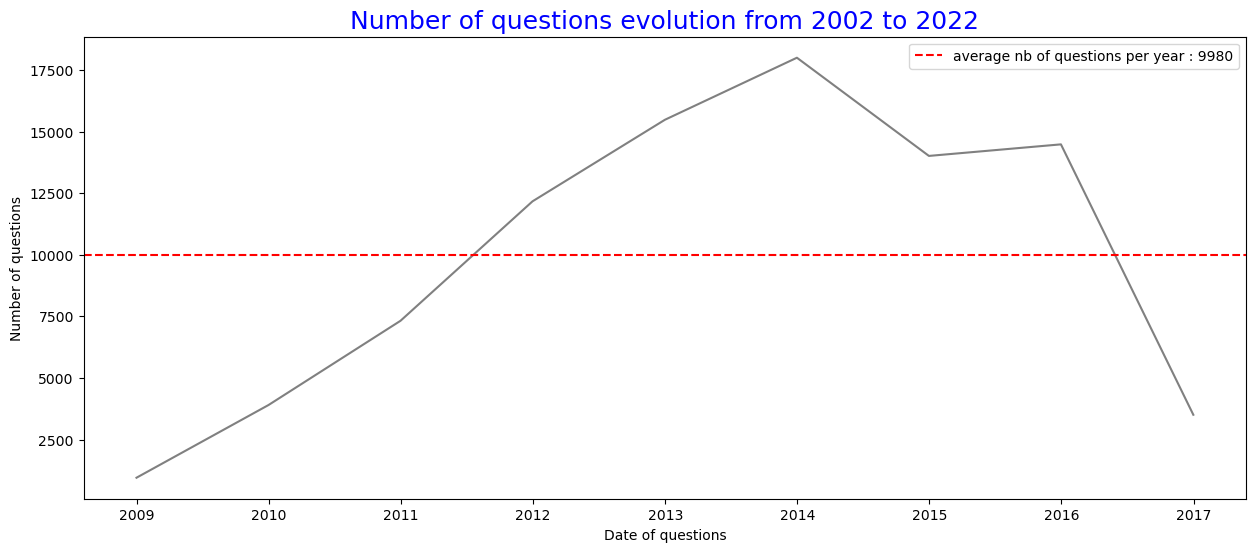

In [13]:

creation_year = data.groupby(pd.Grouper(key='CreationDate',
                                    freq='1Y')).agg({'Title': 'count'})

# plot
fig = plt.figure(figsize=(15,6))
sns.lineplot(data=creation_year, x=creation_year.index, y='Title', color = 'grey')
plt.axhline(creation_year.Title.mean(), 
            color="r", linestyle='--',
            label="average nb of questions per year : {:04d}"\
                   .format(int(creation_year.Title.mean())))
plt.xlabel("Date of questions")
plt.ylabel("Number of questions")
plt.title("Number of questions evolution from 2002 to 2022",
          fontsize=18, color="blue")
plt.legend()
plt.show()

In [14]:
data.CreationDate.max()

Timestamp('2016-04-02 15:13:50')

## Length of questions 

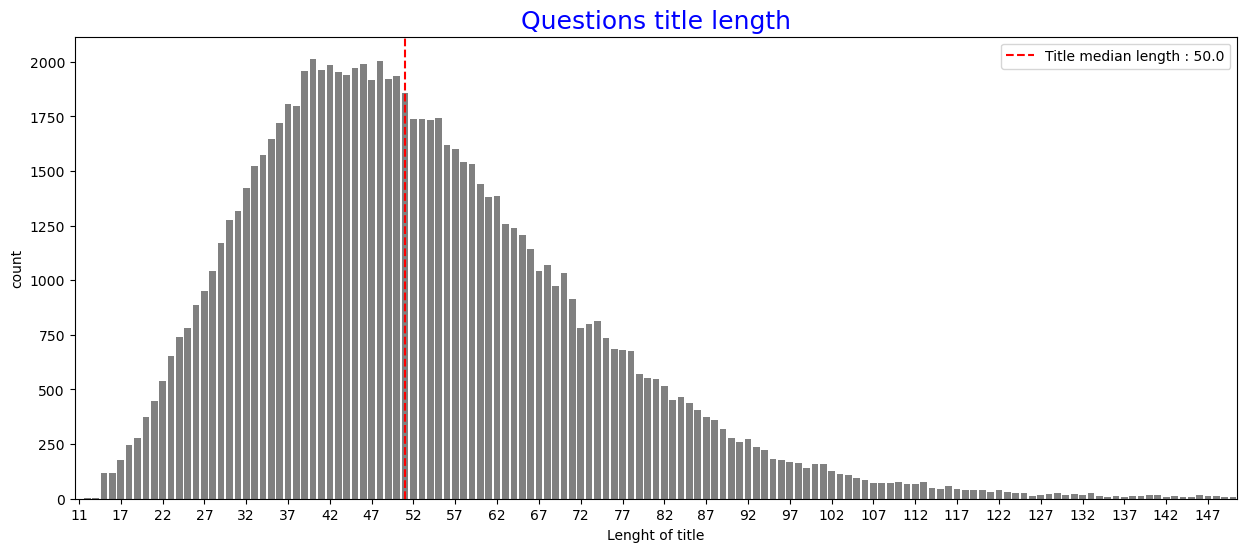

In [15]:
fig = plt.figure(figsize=(15,6))
ax = sns.countplot(x=data.Title.str.len(), color= 'grey')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 5))
plt.axvline(data.Title.str.len().median() - data.Title.str.len().min(),
            color="r", linestyle='--',
            label="Title median length : "+str(data.Title.str.len().median()))
ax.set_axisbelow(True)
ax.set_xlabel("Lenght of title")
plt.title("Questions title length",
          fontsize=18, color="blue")
plt.legend();


## body 

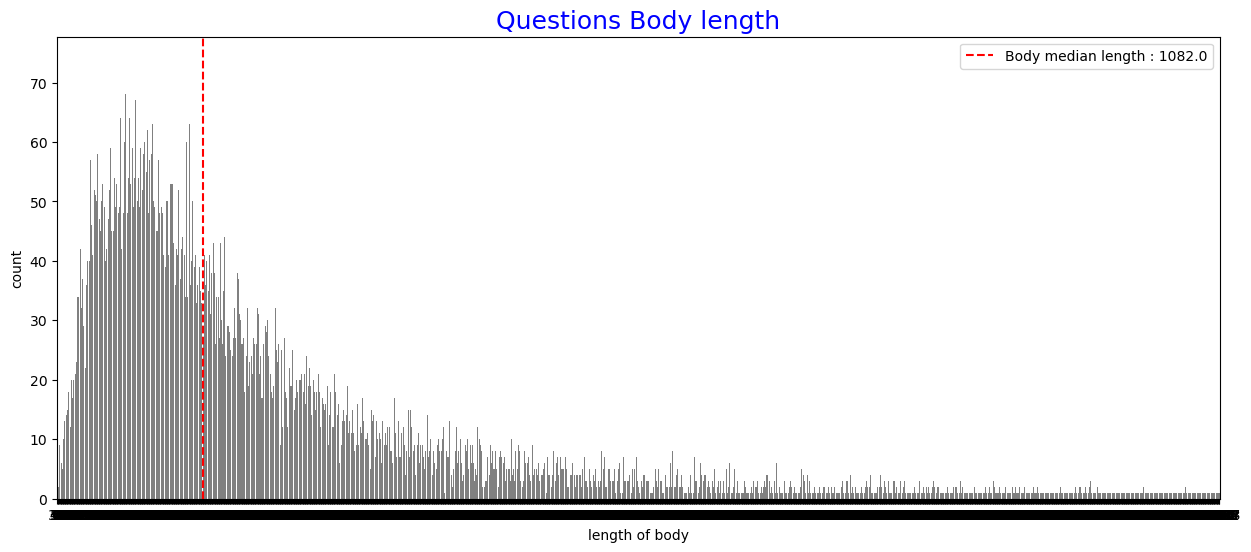

In [16]:
fig = plt.figure(figsize=(15,6))
ax = sns.countplot(x=data.Body.str.len(), color= 'grey')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 5))
plt.axvline(data.Body.str.len().median() - data.Body.str.len().min(),
            color="r", linestyle='--',
            label="Body median length : "+str(data.Body.str.len().median()))
ax.set_xlabel("length of body")
plt.title("Questions Body length",
          fontsize=18, color="blue")
plt.legend();

In [17]:
# Discretizer 
Body = pd.DataFrame(data.Body.str.len())

# with 200 bins
discretizer = KBinsDiscretizer(n_bins=200,
                               encode='ordinal',
                               strategy='uniform')
body_ln = discretizer.fit_transform(Body)
body_ln = discretizer.inverse_transform(body_ln)
body_ln = pd.Series(body_ln.reshape(-1))

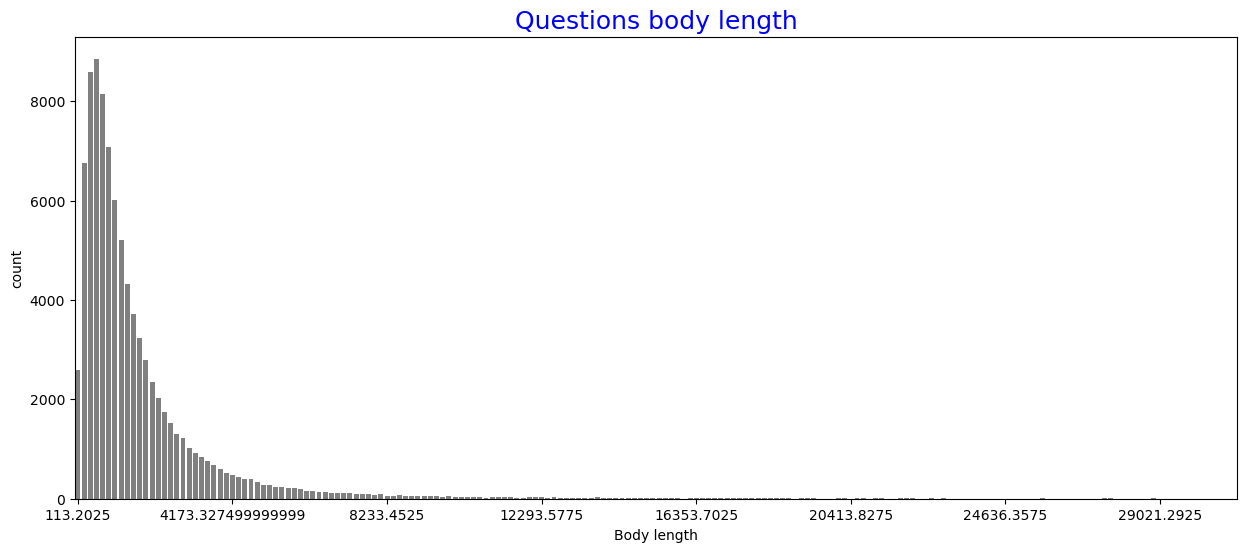

In [18]:
fig = plt.figure(figsize=(15,6))
ax = sns.countplot(x=body_ln, color='grey')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 25))
ax.set_xlabel("Body length")
ax.set_axisbelow(True)
plt.title("Questions body length",
          fontsize=18, color="blue");

## Tags 

In [19]:
data.Tags.head()

Id
4      <c#><floating-point><type-conversion><double><...
9                                   <c#><.net><datetime>
13     <html><browser><timezone><user-agent><timezone...
19     <performance><algorithm><language-agnostic><un...
123                    <java><xml><csv><data-conversion>
Name: Tags, dtype: object

In [20]:
# replace balise
data['Tags'] = data['Tags'].str.translate(str.maketrans({'<': '', '>': ','}))
# Delete last "," 
data['Tags'] = data['Tags'].str[:-1]
data['Tags'].head()

Id
4      c#,floating-point,type-conversion,double,decimal
9                                      c#,.net,datetime
13     html,browser,timezone,user-agent,timezone-offset
19      performance,algorithm,language-agnostic,unix,pi
123                        java,xml,csv,data-conversion
Name: Tags, dtype: object

In [21]:
# split the different words & inject them separately into a list  

In [22]:
def count_split_tags(df, column, separator):
   
    list_words = []
    for word in df[column].str.split(separator):
        list_words.extend(word)
    df_list_words = pd.DataFrame(list_words, columns=["Tag"])
    df_list_words = df_list_words.groupby("Tag")\
        .agg(tag_count=("Tag","count"))
    #df_list_words.rename(columns = {'Tag': 'tag_count'})
    df_list_words.sort_values("tag_count", ascending=False, inplace=True)
    return df_list_words

In [23]:
tags_list = count_split_tags(df=data, column='Tags', separator=',')
print("There are {} tags.".format(tags_list.shape[0]))


There are 15282 tags.


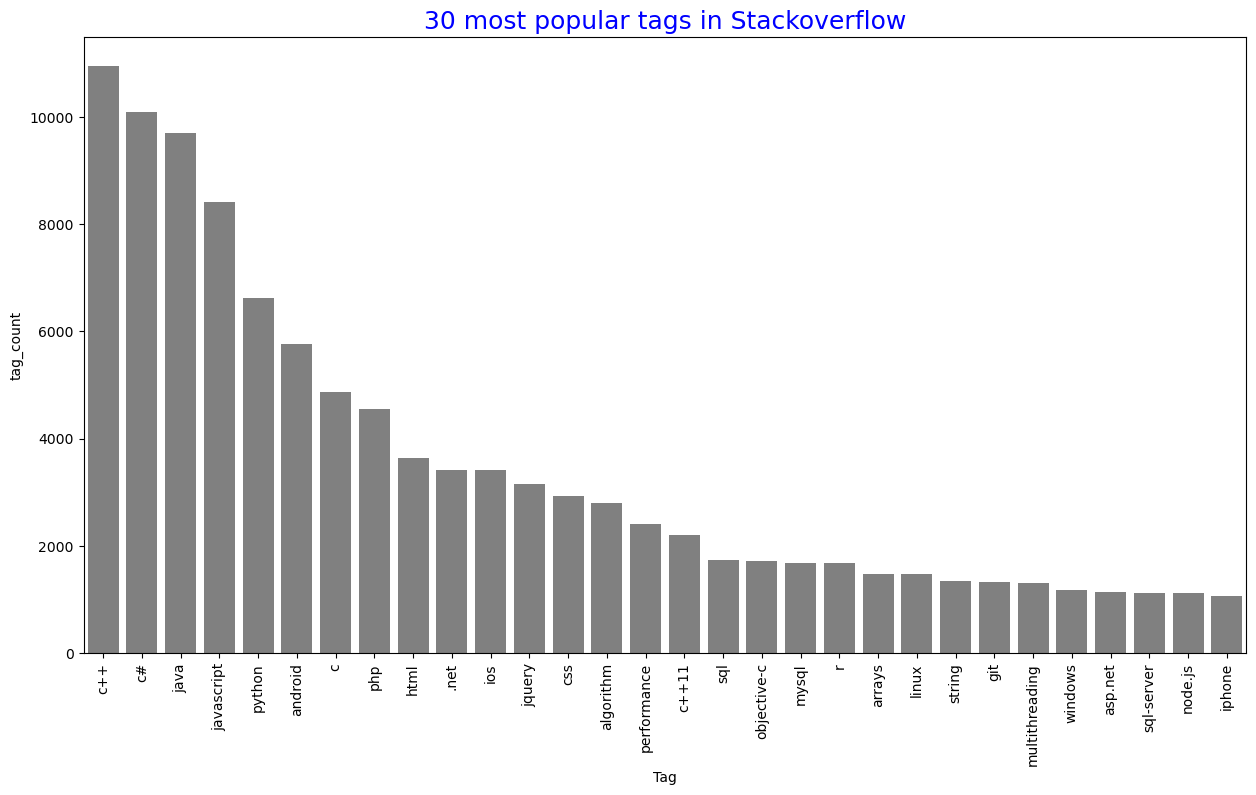

In [24]:
fig = plt.figure(figsize=(15, 8))
ax = sns.barplot(data=tags_list.iloc[0:30, :],
            x=tags_list.iloc[0:30, :].index,
            y="tag_count", color="grey")
plt.xticks(rotation=90)
plt.title("30 most popular tags in Stackoverflow",
          fontsize=18, color="blue")
ax.set_axisbelow(True);

In [25]:
# evolution dans le temps ? 

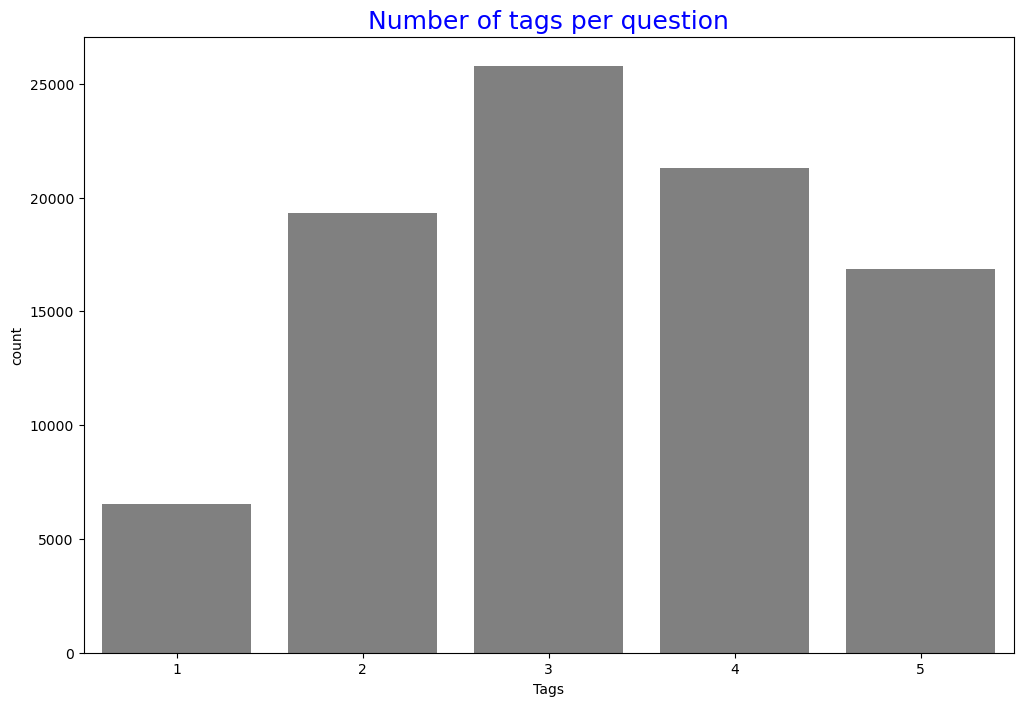

In [26]:
# Create a list of Tags and count the number
data['Tags_list'] = data['Tags'].str.split(',')
data['Tags_count'] = data['Tags_list'].apply(lambda x: len(x))

# Plot the result
fig = plt.figure(figsize=(12, 8))
ax = sns.countplot(x=data.Tags_count, color="grey")
ax.set_xlabel("Tags")
ax.set_axisbelow(True)
plt.title("Number of tags per question",
          fontsize=18, color="blue");

### filtering on most popular tags

In [27]:
top_tags = list(tags_list.iloc[0:50].index)
top_tags

['c++',
 'c#',
 'java',
 'javascript',
 'python',
 'android',
 'c',
 'php',
 'html',
 '.net',
 'ios',
 'jquery',
 'css',
 'algorithm',
 'performance',
 'c++11',
 'sql',
 'objective-c',
 'mysql',
 'r',
 'arrays',
 'linux',
 'string',
 'git',
 'multithreading',
 'windows',
 'asp.net',
 'sql-server',
 'node.js',
 'iphone',
 'regex',
 'json',
 'swift',
 'ruby',
 'haskell',
 'ruby-on-rails',
 'gcc',
 'optimization',
 'asp.net-mvc',
 'angularjs',
 'xcode',
 'delphi',
 'math',
 'macos',
 'visual-studio',
 'eclipse',
 'google-chrome',
 'bash',
 'django',
 'spring']

In [28]:
# subset data on best/most popular tags 
def filter_on_tags(x, top_list):
    tag_list = []
    for item in x:
        if (item in top_list):
            tag_list.append(item)
    return tag_list

In [29]:
data['Tags_list'] = data['Tags_list']\
                    .apply(lambda x: filter_on_tags(x, top_tags))
data['number_of_tags'] = data['Tags_list'].apply(lambda x : len(x))
data = data[data.number_of_tags > 0]
print("Updated data shape : {} questions.".format(data.shape[0]))

Updated data shape : 80236 questions.


In [30]:
#distribution tags
#verif garder tous les tags populaires 

# cleaning questions code

## removing code

In [31]:
import lxml

In [38]:
def remove_code(x):
    """Function based on the Beautifulsoup library intended to replace 
    the content of all the <code> </code> tags of a text specified as a parameter.

    Parameters
    ----------------------------------------
    x : string
        Sequence of characters to modify.
    ----------------------------------------
    """
    soup = BeautifulSoup(x,"html.parser")
    code_to_remove = soup.findAll("code")
    for code in code_to_remove:
        code.replace_with(" ")
    return str(soup)

In [33]:
data.Body

Id
4           <p>I want to assign the decimal variable &quot...
9           <p>Given a <code>DateTime</code> representing ...
13          <p>Is there a standard way for a web server to...
19          <p>I'm looking for the fastest way to obtain t...
123         <p>Is there an existing application or library...
                                  ...                        
36371706    <p>While questions have been asked before abou...
36371748    <p>I am working on a Spring Boot application. ...
36372274    <p>I am trying to perform with JGit all the me...
36372525    <p>I am getting error while compiling Alea GPU...
36372611    <p>I would like to test if a JavaScript object...
Name: Body, Length: 80236, dtype: object

In [34]:
!pip install lxml

In [39]:
# Delete <code> in Body text
data['Body'] = data.Body.apply(remove_code)
# Delete all html tags
data['Body'] = [BeautifulSoup(text, "html.parser").get_text() for text in data['Body']]
print(data['Body'].head(3))

/var/folders/_5/rhjg3s115y30bg6bd3kvpsj00000gn/T/ipykernel_74686/981443136.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Id
4     I want to assign the decimal variable "trans" ...
9     Given a   representing a person's birthday, ho...
13    Is there a standard way for a web server to be...
Name: Body, dtype: object


/var/folders/_5/rhjg3s115y30bg6bd3kvpsj00000gn/T/ipykernel_74686/981443136.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## language

In [41]:
from langdetect import detect

In [42]:
# Create feature "language" with langdetect library
def lang_detect(x):
    try:
        return detect(x)
    except:
        pass

data['short_body'] = data['Body'].apply(lambda x: x.loc[0:100])
data['lang'] = data.short_body.apply(lang_detect)

/var/folders/_5/rhjg3s115y30bg6bd3kvpsj00000gn/T/ipykernel_74686/1257961940.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_5/rhjg3s115y30bg6bd3kvpsj00000gn/T/ipykernel_74686/1257961940.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
pd.DataFrame(data.lang.value_counts())

,lang
en,80139
ca,12
it,11
da,11
fr,10
nl,8
af,7
no,6
sv,4
de,2


In [44]:
# filter data on English questions
data = data[data['lang']=='en']

## clean body

In [45]:
pos_list = ['NOUN', 'PROPN']

In [48]:
!python3 -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 25.3 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [49]:
nlp = spacy.load("en_core_web_sm")

In [50]:
def remove_pos(nlp, x, pos_list):
    doc = nlp(x)
    list_text_row = []
    for token in doc:
        #print(token.pos_)
        if(token.pos_ in pos_list):
            list_text_row.append(token.text)
    join_text_row = " ".join(list_text_row)
    join_text_row = join_text_row.lower().replace("c #", "c#")
    return join_text_row


In [51]:
remove_pos(nlp, 'I want to know how to cook a lasagna', pos_list)

'lasagna'

In [52]:
#multiprocess
! pip install multiprocess

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 5.4 MB/s eta 0:00:00
  Using cached dill-0.3.6-py3-none-any.whl (110 kB)


In [53]:
def text_cleaner(x, nlp, pos_list):
    """Function allowing to 
    - remove extra spaces
    - unicode characters, 
    - English contractions, 
    - links
    - punctuation and numbers.
        
    Parameters
    ----------------------------------------
    x : string
        Sequence of characters to modify.
    ----------------------------------------
    """
    # Remove POS 
    x = remove_pos(nlp, x, pos_list)
    # Case normalization
    x = x.lower()
    # Remove unicode characters
    x = x.encode("ascii", "ignore").decode()
    # Remove English contractions
    x = re.sub("\'\w+", '', x)
    # Remove ponctuation but not #
    x = re.sub('[^\\w\\s#]', '', x)
    # Remove links
    x = re.sub(r'http*\S+', '', x)
    # Remove numbers
    x = re.sub(r'\w*\d+\w*', '', x)
    # Remove extra spaces
    x = re.sub('\s+', ' ', x)
    
    # Return cleaned text
    return x

In [55]:
import spacy
from spacy import displacy
from tqdm import tqdm

In [56]:
# Spacy features
tqdm.pandas()
data['Body_clean'] = data.Body.progress_apply(lambda x : text_cleaner(x, nlp, pos_list))
print(data['Body_clean'].head(3))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80139/80139 [2:58:26<00:00,  7.49it/s]

Id
4                       variable opacity app error type
9                             person birthday age years
13    way web server user timezone web page header p...
Name: Body_clean, dtype: object


In [57]:
data

,CreationDate,Score,ViewCount,AnswerCount,CommentCount,FavoriteCount,Title,Body,Tags,Tags_list,Tags_count,number_of_tags,short_body,lang,Body_clean
Id,,,,,,,,,,,,,,,
4,2008-07-31 21:42:52,792,69863,14,7,0,How to convert Decimal to Double in C#?,"I want to assign the decimal variable ""trans"" ...","c#,floating-point,type-conversion,double,decimal",[c#],5,1,"I want to assign the decimal variable ""trans"" ...",en,variable opacity app error type
9,2008-07-31 23:40:59,2195,776461,72,10,0,How do I calculate someone's age based on a Da...,"Given a representing a person's birthday, ho...","c#,.net,datetime","[c#, .net]",3,2,"Given a representing a person's birthday, ho...",en,person birthday age years
13,2008-08-01 00:42:38,698,272985,27,10,0,Determine a user's timezone,Is there a standard way for a web server to be...,"html,browser,timezone,user-agent,timezone-offset",[html],5,1,Is there a standard way for a web server to be...,en,way web server user timezone web page header p...
19,2008-08-01 05:21:22,350,67052,24,17,0,What is the fastest way to get the value of π?,I'm looking for the fastest way to obtain the ...,"performance,algorithm,language-agnostic,unix,pi","[performance, algorithm]",5,2,I'm looking for the fastest way to obtain the ...,en,way value challenge ways constants number prog...
123,2008-08-01 16:08:52,120,80193,16,8,0,Java lib or app to convert CSV to XML file?,Is there an existing application or library in...,"java,xml,csv,data-conversion",[java],4,1,Is there an existing application or library in...,en,application library java data file tags row co...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36371706,2016-04-02 09:48:45,6,1443,1,6,0,"Linked lists, arrays, and hardware memory caches",While questions have been asked before about l...,"arrays,performance,linked-list,language-agnost...","[arrays, performance]",5,2,While questions have been asked before about l...,en,questions lists arrays answers point lists arr...
36371748,2016-04-02 09:52:42,73,143214,8,6,0,Spring Boot access static resources missing sc...,I am working on a Spring Boot application. I n...,"java,spring,spring-boot,resources,spring-prope...","[java, spring]",5,2,I am working on a Spring Boot application. I n...,en,spring boot application xml file start problem...
36372274,2016-04-02 10:48:30,6,1546,1,6,0,How to get conflicts before merge with JGit?,I am trying to perform with JGit all the merge...,"git,conflict,jgit,simulate",[git],4,1,I am trying to perform with JGit all the merge...,en,jgit merge scenarios project conflicts conflic...


In [58]:
# Tockenization
data['Body_clean'] = data.Body_clean.apply(nltk.tokenize.word_tokenize)

# List of stopwords 
stop_words = stopwords.words("english")

# Remove stopwords
tqdm.pandas()
data['Body_clean'] = data.Body_clean\
    .apply(lambda x : [word for word in x
                       if word not in stop_words
                       and len(word)>2])
print('-' * 20)
print(data['Body_clean'].head(3))

--------------------
Id
4                 [variable, opacity, app, error, type]
9                        [person, birthday, age, years]
13    [way, web, server, user, timezone, web, page, ...
Name: Body_clean, dtype: object


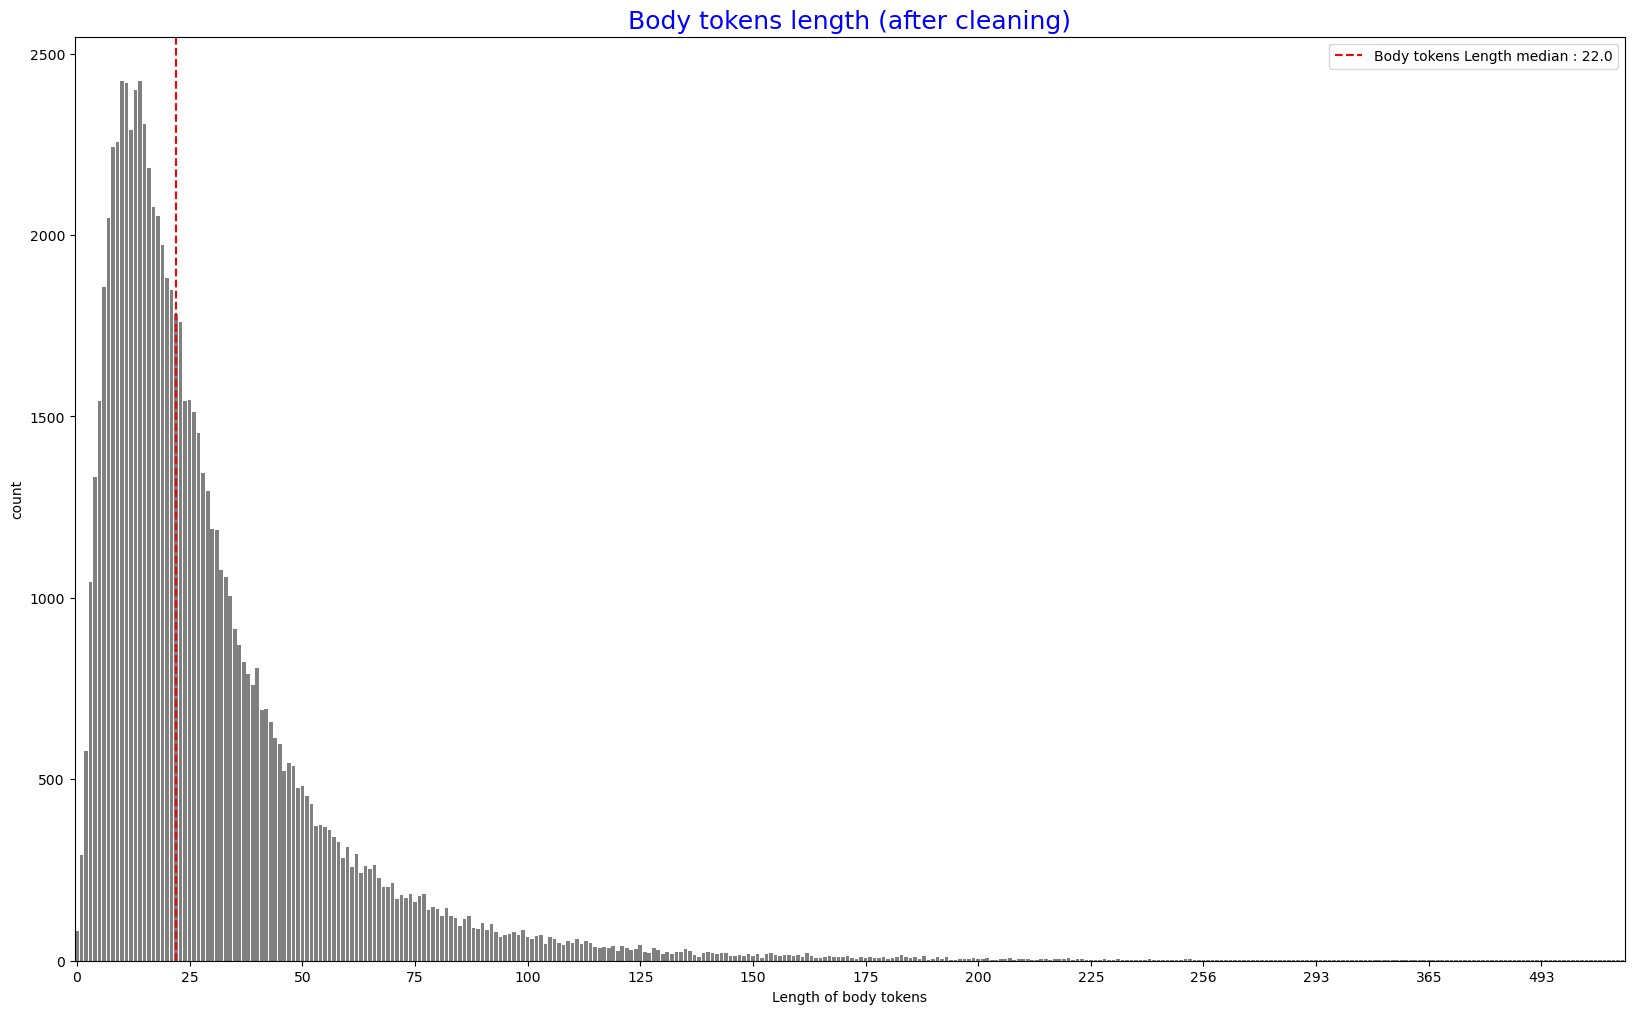

In [59]:
# Calculate lenght of each list in Body
data['body_tokens_count'] = [len(_) for _ in data.Body_clean]

# Countplot of body lenght
fig = plt.figure(figsize=(20, 12))
ax = sns.countplot(x=data.body_tokens_count, color="grey")
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 25))
plot_median = data.body_tokens_count.median()
plt.axvline(plot_median - data.body_tokens_count.min(),
            color="r", linestyle='--',
            label="Body tokens Length median : "+str(plot_median))
ax.set_xlabel("Length of body tokens")
plt.title("Body tokens length (after cleaning)",
          fontsize=18, color="blue")
plt.legend()
plt.show()

In [60]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/oumniasadaouni/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/oumniasadaouni/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [61]:
# Apply lemmatizer on Body
wn = WordNetLemmatizer()
data['Body_clean'] = data.Body_clean\
    .apply(lambda x : [wn.lemmatize(word) for word in x])
print('-' * 50)
print(data['Body_clean'].head(3))
print('-' * 50)

--------------------------------------------------
Id
4                 [variable, opacity, app, error, type]
9                         [person, birthday, age, year]
13    [way, web, server, user, timezone, web, page, ...
Name: Body_clean, dtype: object
--------------------------------------------------


In [62]:
#list of all tokens for Body
full_corpus = []
for i in data['Body_clean']:
    full_corpus.extend(i)

# distribition of words in Body token list
body_dist = nltk.FreqDist(full_corpus)
body_dist = pd.DataFrame(body_dist.most_common(2000),
                         columns=['Word', 'Frequency'])
body_dist.describe()

,Frequency
count,2000.000000
mean,1076.065000
std,2764.432327
min,93.000000
25%,150.000000
50%,286.000000
75%,789.250000
max,51549.000000


## Titles

In [63]:
def text_cleaner(x, nlp, pos_list, lang="english"):
    
    # Remove POS not in "NOUN", "PROPN"
    x = remove_pos(nlp, x, pos_list)
    # Case normalization
    x = x.lower()
    # Remove unicode characters
    x = x.encode("ascii", "ignore").decode()
    # Remove English contractions
    x = re.sub("\'\w+", '', x)
    # Remove ponctuation but not # (for C# for example)
    x = re.sub('[^\\w\\s#]', '', x)
    # Remove links
    x = re.sub(r'http*\S+', '', x)
    # Remove numbers
    x = re.sub(r'\w*\d+\w*', '', x)
    # Remove extra spaces
    x = re.sub('\s+', ' ', x)
        
    # Tokenization
    x = nltk.tokenize.word_tokenize(x)
    # List of stopwords
    stop_words = stopwords.words(lang)
    # Remove stopwords
    x = [word for word in x if word not in stop_words 
         and len(word)>2]
    # Lemmatizer
    wn = nltk.WordNetLemmatizer()
    x = [wn.lemmatize(word) for word in x]
    
    # Return cleaned text
    return x

In [64]:
# cleaner on Title
data['Title_clean'] = data.Title\
                            .progress_apply(lambda x: 
                                            text_cleaner(x,
                                                         nlp,
                                                         pos_list,
                                                         "english"))
print('-' * 20)
print(data['Title_clean'].head(3))
print('-' * 20)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80139/80139 [07:44<00:00, 172.37it/s]

--------------------
Id
4                           [decimal]
9     [age, datetime, type, birthday]
13                   [user, timezone]
Name: Title_clean, dtype: object
--------------------


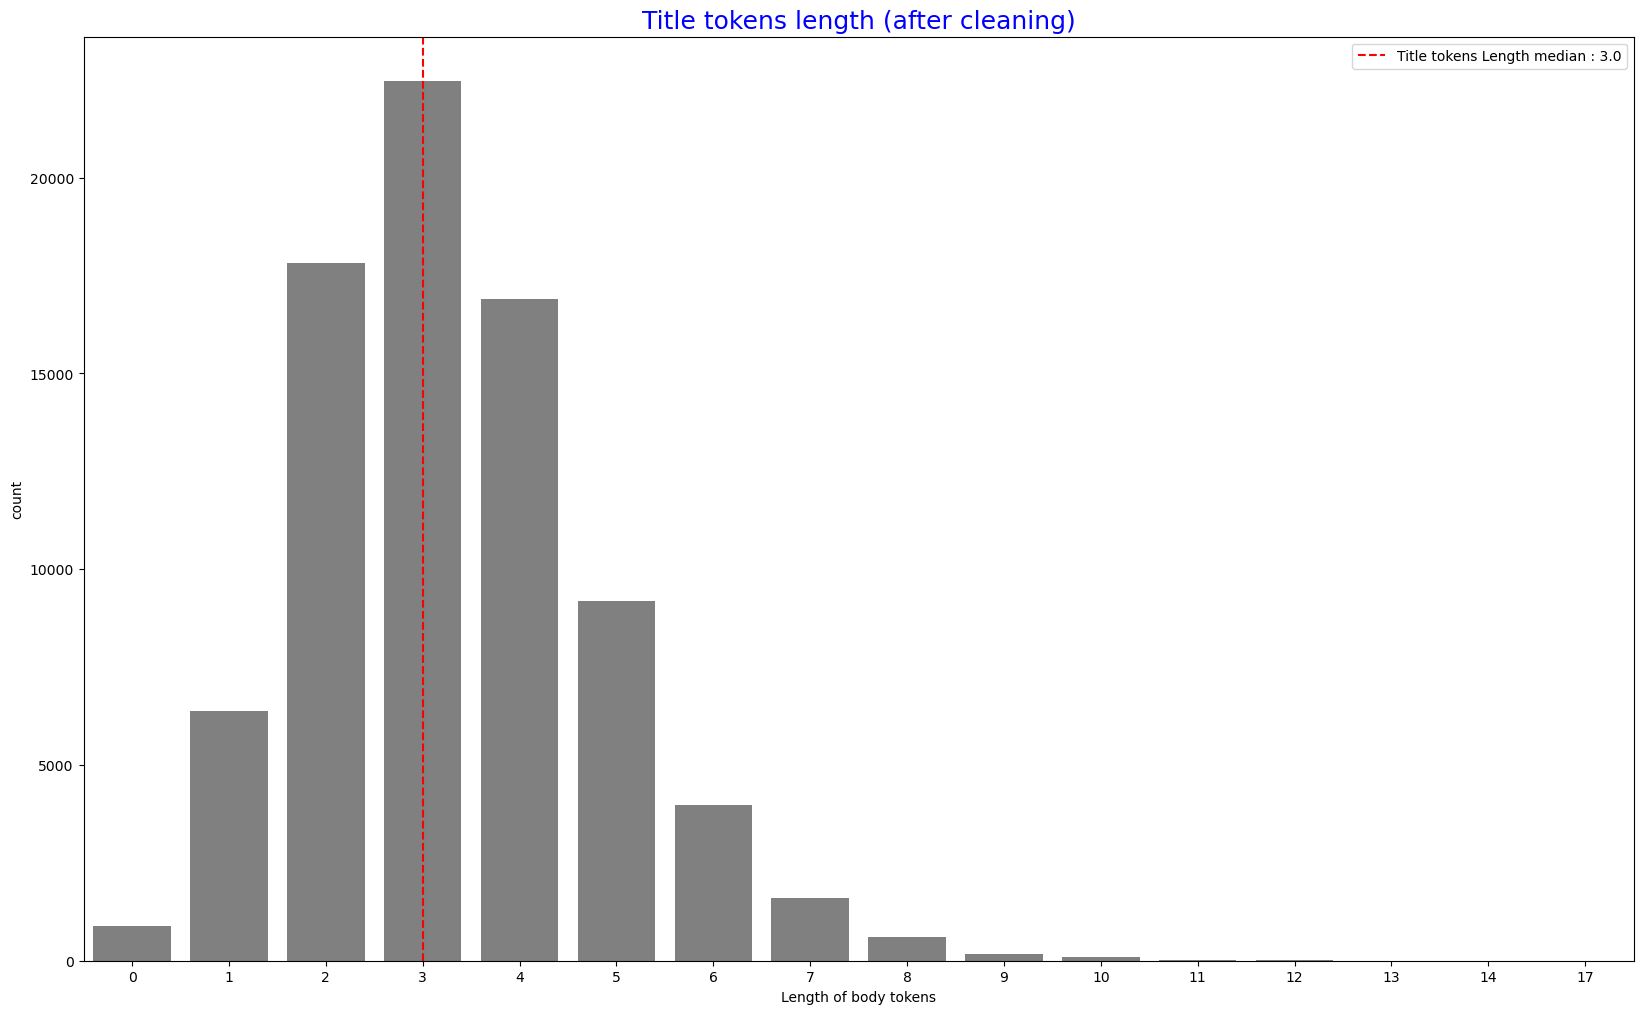

In [65]:
# length of each list in Body
data['Title_tokens_count'] = [len(_) for _ in data.Title_clean]

# Countplot of body lenght
fig = plt.figure(figsize=(20, 12))
ax = sns.countplot(x=data.Title_tokens_count, color="grey")
median_plot = data.Title_tokens_count.median()
plt.axvline(median_plot - data.Title_tokens_count.min(),
            color="r", linestyle='--',
            label="Title tokens Length median : "+str(median_plot))
ax.set_xlabel("Length of body tokens")
plt.title("Title tokens length (after cleaning)",
          fontsize=18, color="blue")
plt.legend()
plt.show()

In [66]:
data

,CreationDate,Score,ViewCount,AnswerCount,CommentCount,FavoriteCount,Title,Body,Tags,Tags_list,Tags_count,number_of_tags,short_body,lang,Body_clean,body_tokens_count,Title_clean,Title_tokens_count
Id,,,,,,,,,,,,,,,,,,
4,2008-07-31 21:42:52,792,69863,14,7,0,How to convert Decimal to Double in C#?,"I want to assign the decimal variable ""trans"" ...","c#,floating-point,type-conversion,double,decimal",[c#],5,1,"I want to assign the decimal variable ""trans"" ...",en,"[variable, opacity, app, error, type]",5,[decimal],1
9,2008-07-31 23:40:59,2195,776461,72,10,0,How do I calculate someone's age based on a Da...,"Given a representing a person's birthday, ho...","c#,.net,datetime","[c#, .net]",3,2,"Given a representing a person's birthday, ho...",en,"[person, birthday, age, year]",4,"[age, datetime, type, birthday]",4
13,2008-08-01 00:42:38,698,272985,27,10,0,Determine a user's timezone,Is there a standard way for a web server to be...,"html,browser,timezone,user-agent,timezone-offset",[html],5,1,Is there a standard way for a web server to be...,en,"[way, web, server, user, timezone, web, page, ...",10,"[user, timezone]",2
19,2008-08-01 05:21:22,350,67052,24,17,0,What is the fastest way to get the value of π?,I'm looking for the fastest way to obtain the ...,"performance,algorithm,language-agnostic,unix,pi","[performance, algorithm]",5,2,I'm looking for the fastest way to obtain the ...,en,"[way, value, challenge, way, constant, number,...",42,"[way, value]",2
123,2008-08-01 16:08:52,120,80193,16,8,0,Java lib or app to convert CSV to XML file?,Is there an existing application or library in...,"java,xml,csv,data-conversion",[java],4,1,Is there an existing application or library in...,en,"[application, library, java, data, file, tag, ...",9,"[java, lib, app, csv, xml, file]",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36371706,2016-04-02 09:48:45,6,1443,1,6,0,"Linked lists, arrays, and hardware memory caches",While questions have been asked before about l...,"arrays,performance,linked-list,language-agnost...","[arrays, performance]",5,2,While questions have been asked before about l...,en,"[question, list, array, answer, point, list, a...",37,"[list, array, hardware, memory, cache]",5
36371748,2016-04-02 09:52:42,73,143214,8,6,0,Spring Boot access static resources missing sc...,I am working on a Spring Boot application. I n...,"java,spring,spring-boot,resources,spring-prope...","[java, spring]",5,2,I am working on a Spring Boot application. I n...,en,"[spring, boot, application, xml, file, start, ...",39,"[spring, boot, access, resource, scr, resource]",6
36372274,2016-04-02 10:48:30,6,1546,1,6,0,How to get conflicts before merge with JGit?,I am trying to perform with JGit all the merge...,"git,conflict,jgit,simulate",[git],4,1,I am trying to perform with JGit all the merge...,en,"[jgit, merge, scenario, project, conflict, con...",16,"[conflict, merge, jgit]",3


In [67]:
#list of all tokens for Title
full_corpus_t = []
for i in data['Title_clean']:
    full_corpus_t.extend(i)

#distribition of words in Title token list
title_dist = nltk.FreqDist(full_corpus_t)
title_dist = pd.DataFrame(title_dist.most_common(500),
                          columns=['Word', 'Frequency'])
title_dist.describe()

,Frequency
count,500.000000
mean,366.138000
std,472.635466
min,87.000000
25%,122.000000
50%,204.000000
75%,412.250000
max,3551.000000


## Export clean data

In [68]:
# Filter on number of Body tokens > 5
data = data[(data.body_tokens_count >= 5) & (data.Title_tokens_count > 0)]
# drop engineered features
data = data[['Title_clean',
             'Body_clean',
             'Score',
             'Tags_list']]
data = data.rename(columns={'Title_clean': 'Title',
                            'Body_clean': 'Body',
                            'Tags_list': 'Tags'})
data.head(3)

,Title,Body,Score,Tags
Id,,,,
4,[decimal],"[variable, opacity, app, error, type]",792,[c#]
13,"[user, timezone]","[way, web, server, user, timezone, web, page, ...",698,[html]
19,"[way, value]","[way, value, challenge, way, constant, number,...",350,"[performance, algorithm]"


In [69]:
# Export to CSV
data.to_csv("StackOverflow_questions_2009_2020_cleaned.csv", sep=";")